In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, cross_val_score
from sklearn.feature_selection import mutual_info_classif

In [2]:
np.random.seed(seed=65)

In [3]:
file_path = 'smoking_driking_dataset_Ver01.csv'
df = pd.read_csv(file_path)

In [4]:
Random_State=56

In [5]:


target_column = 'SMK_stat_type_cd'  

# Determine the minimum number of instances per class
min_class_count = df[target_column].value_counts().min()


desired_sample_size = 5000  # or any number between the number of classes and min_class_count

# Sample the data
df = df.groupby(target_column).apply(lambda x: x.sample(n=desired_sample_size, random_state=28)).reset_index(drop=True)

# Print the number of instances per class in the sampled DataFrame
print(df[target_column].value_counts())


SMK_stat_type_cd
1.0    5000
2.0    5000
3.0    5000
Name: count, dtype: int64


C:\Users\nimes\AppData\Local\Temp\ipykernel_10864\1144810271.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby(target_column).apply(lambda x: x.sample(n=desired_sample_size, random_state=28)).reset_index(drop=True)


In [6]:
df['DRK_YN'] = df['DRK_YN'].map({'Y': 1, 'N': 0})
df['sex'] = df['sex'].map({'Male':0,'Female':1})

In [7]:
X = df.drop('SMK_stat_type_cd', axis=1)
y = df['SMK_stat_type_cd']

In [8]:
print("\nStatistics of the attributes:")
print(X.describe())


Statistics of the attributes:
                sex           age        height        weight     waistline  \
count  15000.000000  15000.000000  15000.000000  15000.000000  15000.000000   
mean       0.285933     47.447333    164.671333     66.002667     82.817173   
std        0.451873     13.708626      8.771570     12.536818      9.338690   
min        0.000000     20.000000    135.000000     30.000000     50.000000   
25%        0.000000     40.000000    160.000000     55.000000     76.400000   
50%        0.000000     45.000000    165.000000     65.000000     83.000000   
75%        1.000000     55.000000    170.000000     75.000000     89.000000   
max        1.000000     85.000000    190.000000    130.000000    126.000000   

         sight_left   sight_right     hear_left    hear_right           SBP  \
count  15000.000000  15000.000000  15000.000000  15000.000000  15000.000000   
mean       1.001507      0.997720      1.030400      1.028333    123.444067   
std        0.595362 

In [9]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [11]:
print("\nStatistics after feature scaling:")
print(pd.DataFrame(X_scaled).describe())


Statistics after feature scaling:
                sex           age        height        weight     waistline  \
count  1.500000e+04  1.500000e+04  1.500000e+04  1.500000e+04  1.500000e+04   
mean  -3.031649e-17  4.547474e-17 -3.941144e-16 -2.728484e-16 -1.106552e-15   
std    1.000033e+00  1.000033e+00  1.000033e+00  1.000033e+00  1.000033e+00   
min   -6.327950e-01 -2.002261e+00 -3.382784e+00 -2.871850e+00 -3.514226e+00   
25%   -6.327950e-01 -5.432770e-01 -5.325716e-01 -8.776576e-01 -6.871828e-01   
50%   -6.327950e-01 -1.785310e-01  3.747079e-02 -7.998043e-02  1.957799e-02   
75%    1.580291e+00  5.509610e-01  6.075132e-01  7.176967e-01  6.620878e-01   
max    1.580291e+00  2.739437e+00  2.887683e+00  5.104921e+00  4.624231e+00   

         sight_left   sight_right     hear_left    hear_right           SBP  \
count  1.500000e+04  1.500000e+04  1.500000e+04  1.500000e+04  1.500000e+04   
mean   1.894781e-16 -9.094947e-17  1.496877e-16  6.631732e-17 -3.410605e-16   
std    1.000033e

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42,stratify=y)

In [13]:
knn = KNeighborsClassifier(n_jobs=-1)

In [14]:
print("\nParameters of the default KNN model:")
print(knn.get_params())


Parameters of the default KNN model:
{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': -1, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}


In [15]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_jobs=-1)

In [16]:
y_pred = knn.predict(X_test)

In [17]:
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)


Confusion Matrix:
[[757 158  85]
 [172 580 248]
 [162 421 417]]



Confusion Matrix:
[[757 158  85]
 [172 580 248]
 [162 421 417]]


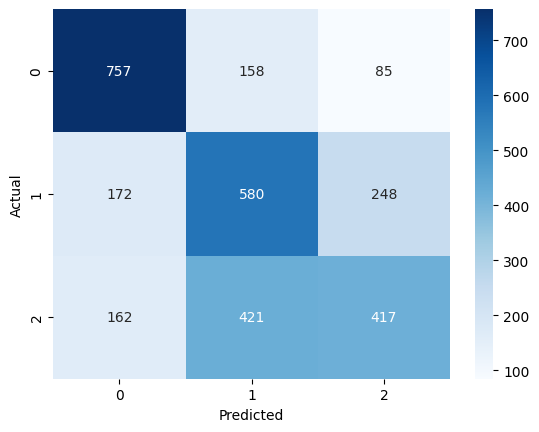

In [18]:
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
# #####plt.title('Confusion Matrix for Default KNN')
plt.savefig("images/confusion-matrix-default-knn.png",bbox_inches='tight')
plt.show()

In [19]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

         1.0       0.69      0.76      0.72      1000
         2.0       0.50      0.58      0.54      1000
         3.0       0.56      0.42      0.48      1000

    accuracy                           0.58      3000
   macro avg       0.58      0.58      0.58      3000
weighted avg       0.58      0.58      0.58      3000



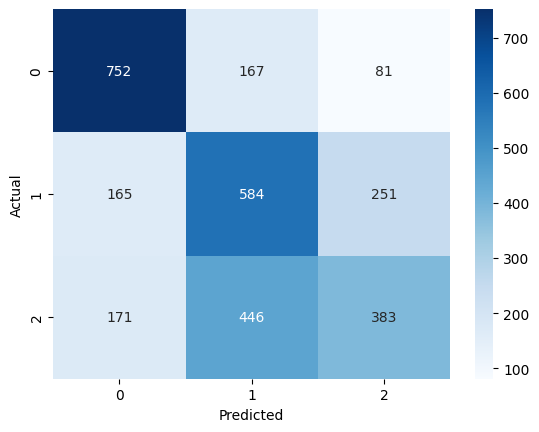

              precision    recall  f1-score   support

         1.0       0.69      0.75      0.72      1000
         2.0       0.49      0.58      0.53      1000
         3.0       0.54      0.38      0.45      1000

    accuracy                           0.57      3000
   macro avg       0.57      0.57      0.57      3000
weighted avg       0.57      0.57      0.57      3000



In [20]:
knn = KNeighborsClassifier(n_jobs=-1,metric='chebyshev')
knn.fit(X_train,y_train)
sns.heatmap(confusion_matrix(y_test,knn.predict(X_test)),annot = True, fmt='d', cmap = 'Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('Images/confusion-matrix-chebyshev.png',bbox_inches = 'tight')
plt.show()
print(classification_report(y_test,knn.predict(X_test)))

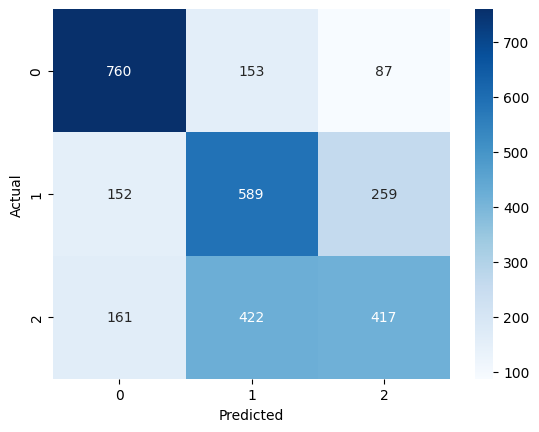

              precision    recall  f1-score   support

         1.0       0.71      0.76      0.73      1000
         2.0       0.51      0.59      0.54      1000
         3.0       0.55      0.42      0.47      1000

    accuracy                           0.59      3000
   macro avg       0.59      0.59      0.58      3000
weighted avg       0.59      0.59      0.58      3000



In [21]:
knn = KNeighborsClassifier(n_jobs=-1,metric='manhattan')
knn.fit(X_train,y_train)
sns.heatmap(confusion_matrix(y_test,knn.predict(X_test)),annot = True, fmt='d', cmap = 'Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('Images/confusion-matrix-manhattan.png',bbox_inches = 'tight')
plt.show()
print(classification_report(y_test,knn.predict(X_test)))

In [22]:
df_corr = pd.concat([X, y], axis=1)
correlation = df_corr.corr()
correlation_with_label = correlation['SMK_stat_type_cd'].drop('SMK_stat_type_cd')
print("\nCorrelation with class variable:")
print(correlation_with_label)


Correlation with class variable:
sex                -0.589797
age                -0.162100
height              0.455617
weight              0.331382
waistline           0.228827
sight_left          0.051307
sight_right         0.058230
hear_left          -0.029961
hear_right         -0.024113
SBP                 0.072242
DBP                 0.118293
BLDS                0.061920
tot_chole           0.015634
HDL_chole          -0.173744
LDL_chole          -0.011639
triglyceride        0.190051
hemoglobin          0.436955
urine_protein      -0.004619
serum_creatinine    0.078042
SGOT_AST            0.065919
SGOT_ALT            0.123669
gamma_GTP           0.203490
DRK_YN              0.341801
Name: SMK_stat_type_cd, dtype: float64


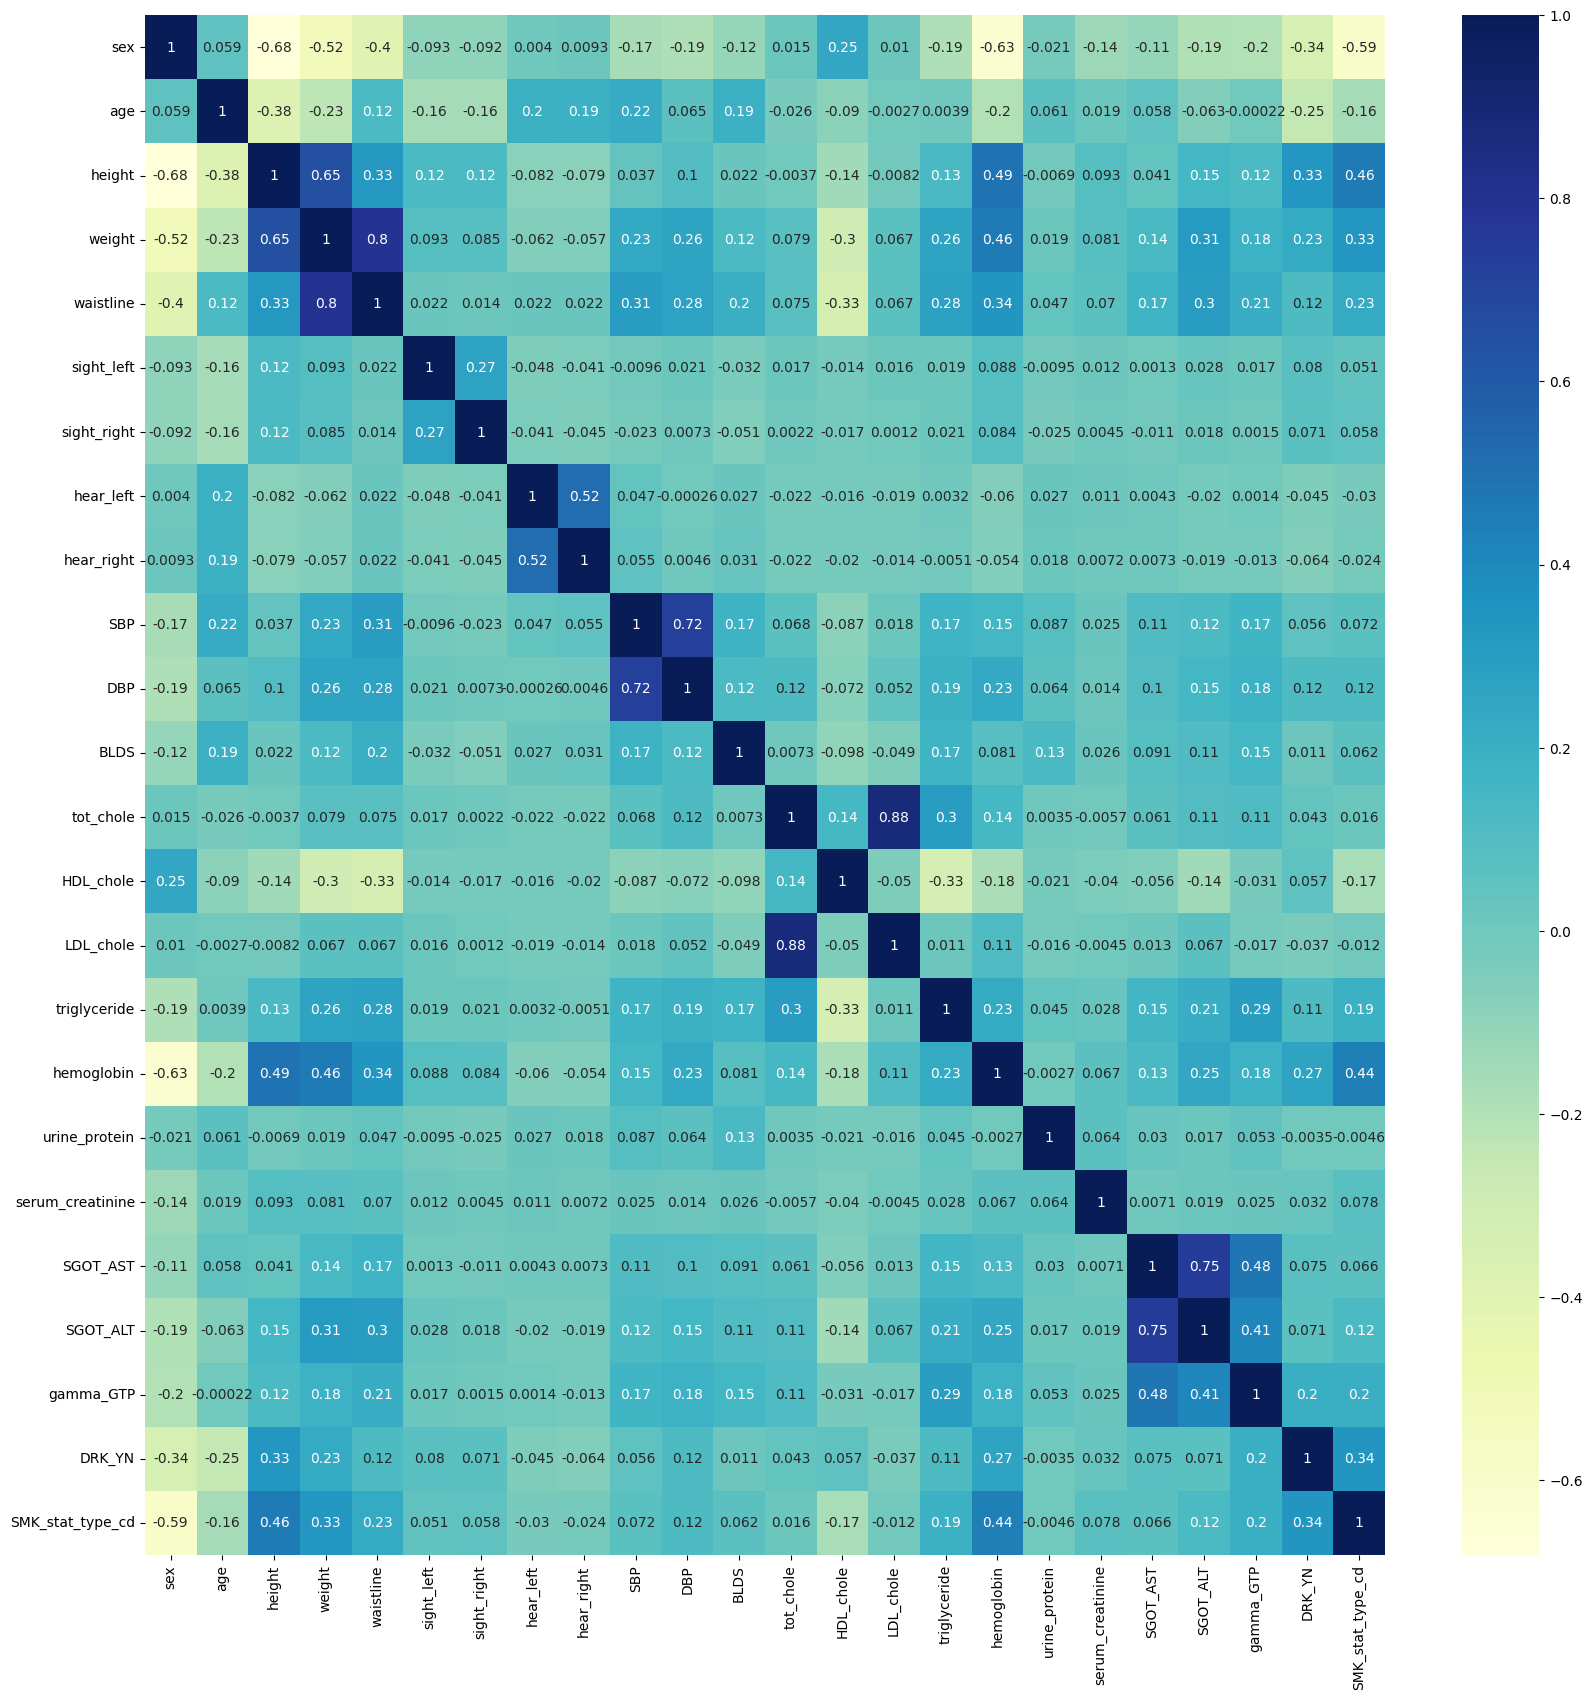

In [112]:
plt.figure(figsize=(20,20))
dataplot = sns.heatmap(df_corr.corr(), cmap="YlGnBu", annot=True,)
plt.savefig('images/corelation-matrix.png',bbox_inches='tight')
plt.show()

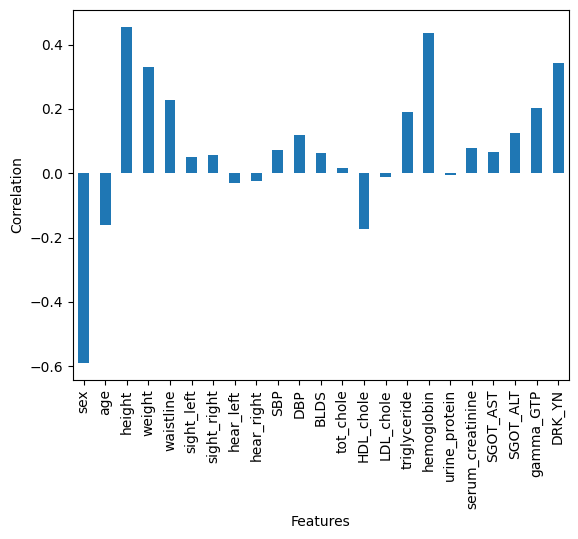

In [113]:
correlation_with_label.plot(kind='bar')
#plt.title('Correlation of Features with Class Variable')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.savefig('images/corelation-bar-plot.png',bbox_inches='tight')
plt.show()

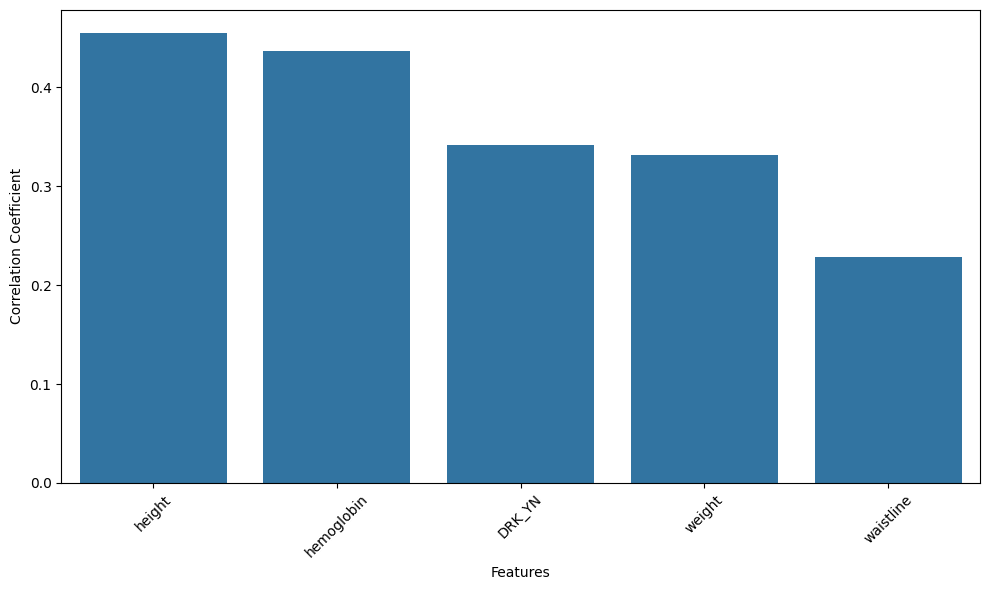

In [114]:
top_positive_corr = correlation_with_label.nlargest(5)

# Plotting the top 5 positive correlations
plt.figure(figsize=(10, 6))
sns.barplot(x=top_positive_corr.index, y=top_positive_corr.values)
#plt.title('Top 5 Positive Correlations with Label')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('images/corelation-top5-bar-plot.png',bbox_inches='tight')
plt.show()


In [115]:


# Set the random seed


# Generate random weights
weights = np.random.random(23)
weights


array([0.21864505, 0.03140272, 0.28712528, 0.17264466, 0.30337638,
       0.16295022, 0.69931375, 0.77151083, 0.51455245, 0.23580689,
       0.23003963, 0.50571517, 0.13418496, 0.56146226, 0.4820002 ,
       0.67966876, 0.73870729, 0.16514066, 0.10069371, 0.92758757,
       0.22027153, 0.10020807, 0.79305629])

In [116]:
knn_weighted = KNeighborsClassifier(metric='minkowski',metric_params={'w':weights},n_jobs=-1)
knn_weighted.fit(X_train,y_train)


KNeighborsClassifier(metric_params={'w': array([0.21864505, 0.03140272, 0.28712528, 0.17264466, 0.30337638,
       0.16295022, 0.69931375, 0.77151083, 0.51455245, 0.23580689,
       0.23003963, 0.50571517, 0.13418496, 0.56146226, 0.4820002 ,
       0.67966876, 0.73870729, 0.16514066, 0.10069371, 0.92758757,
       0.22027153, 0.10020807, 0.79305629])},
                     n_jobs=-1)

In [117]:
y_pred_weighted = knn_weighted.predict(X_test)
# y_pred_proba_weighted = knn_weighted.predict_proba(X_test)


Confusion Matrix:
[[743 181  76]
 [173 548 279]
 [174 444 382]]


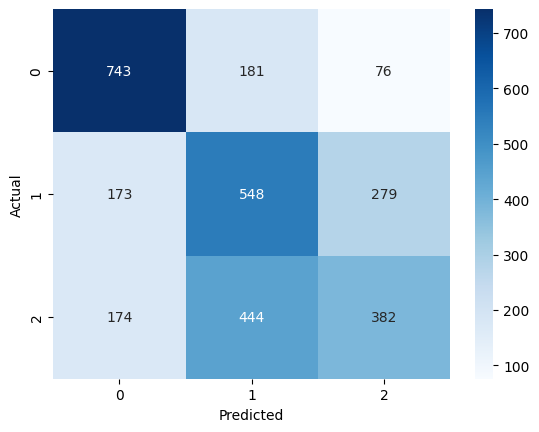

In [118]:
cm = confusion_matrix(y_test, y_pred_weighted)
print("\nConfusion Matrix:")
print(cm)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
# #plt.title('Confusion Matrix for Weighted KNN')
plt.savefig('images/confusion-matrix-random-weight-knn.png',bbox_inches='tight')
plt.show()

In [119]:
print("\nClassification Report Weighted:")
print(classification_report(y_test, y_pred_weighted))


Classification Report Weighted:
              precision    recall  f1-score   support

         1.0       0.68      0.74      0.71      1000
         2.0       0.47      0.55      0.50      1000
         3.0       0.52      0.38      0.44      1000

    accuracy                           0.56      3000
   macro avg       0.56      0.56      0.55      3000
weighted avg       0.56      0.56      0.55      3000



In [120]:
# np.random.seed(seed = Random_State)
weights = np.ones(23)
# weights_for_top4 = np.sort(np.random.uniform(1,4,size = 4))[::-1]
weights_for_top4 = np.random.uniform(1, 4, size=4)
# weights_for_top4 = [4,3,2,1]

In [121]:
top4_positive_correlation_columns = correlation_with_label.sort_values(ascending=False).head(4).index.tolist()
top4_positive_correlation_columns

['height', 'hemoglobin', 'DRK_YN', 'weight']

In [122]:
top4_positive_correlation_index = [X_train.columns.get_loc(column_name) for column_name in top4_positive_correlation_columns]
top4_positive_correlation_index

[2, 16, 22, 3]

In [123]:
weights[top4_positive_correlation_index] = weights_for_top4
weights

array([1.        , 1.        , 1.32227928, 2.59771774, 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 2.36722272, 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.32134839])

In [124]:
knn_weighted = KNeighborsClassifier(metric='minkowski',metric_params={'w':weights},n_jobs=-1)
knn_weighted.fit(X_train,y_train)

KNeighborsClassifier(metric_params={'w': array([1.        , 1.        , 1.32227928, 2.59771774, 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 2.36722272, 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.32134839])},
                     n_jobs=-1)

In [125]:
y_pred_weighted = knn_weighted.predict(X_test)
# y_pred_weighted_proba = knn_weighted.predict_proba(X_test)


Confusion Matrix:
[[758 159  83]
 [165 591 244]
 [154 436 410]]


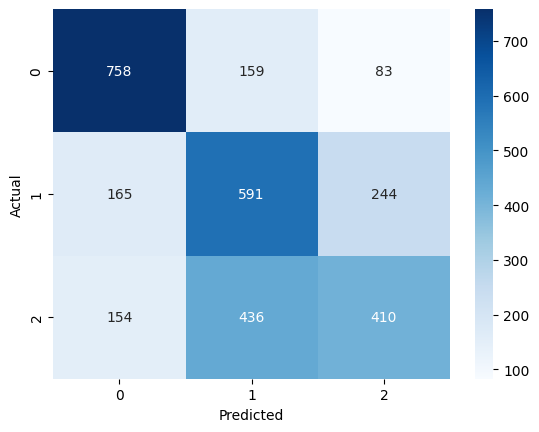

In [126]:
cm = confusion_matrix(y_test,y_pred_weighted)
print("\nConfusion Matrix:")
print(cm)
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
#plt.title('Confusion Matrix of Top 4 Positively Correlated Features Weighted')
plt.savefig('images/confusion-matrix-top4-weighted-knn.png',bbox_inches='tight')
plt.show()

In [127]:
print('\nClassification Report Weighted:')
print(classification_report(y_test,y_pred_weighted))


Classification Report Weighted:
              precision    recall  f1-score   support

         1.0       0.70      0.76      0.73      1000
         2.0       0.50      0.59      0.54      1000
         3.0       0.56      0.41      0.47      1000

    accuracy                           0.59      3000
   macro avg       0.59      0.59      0.58      3000
weighted avg       0.59      0.59      0.58      3000



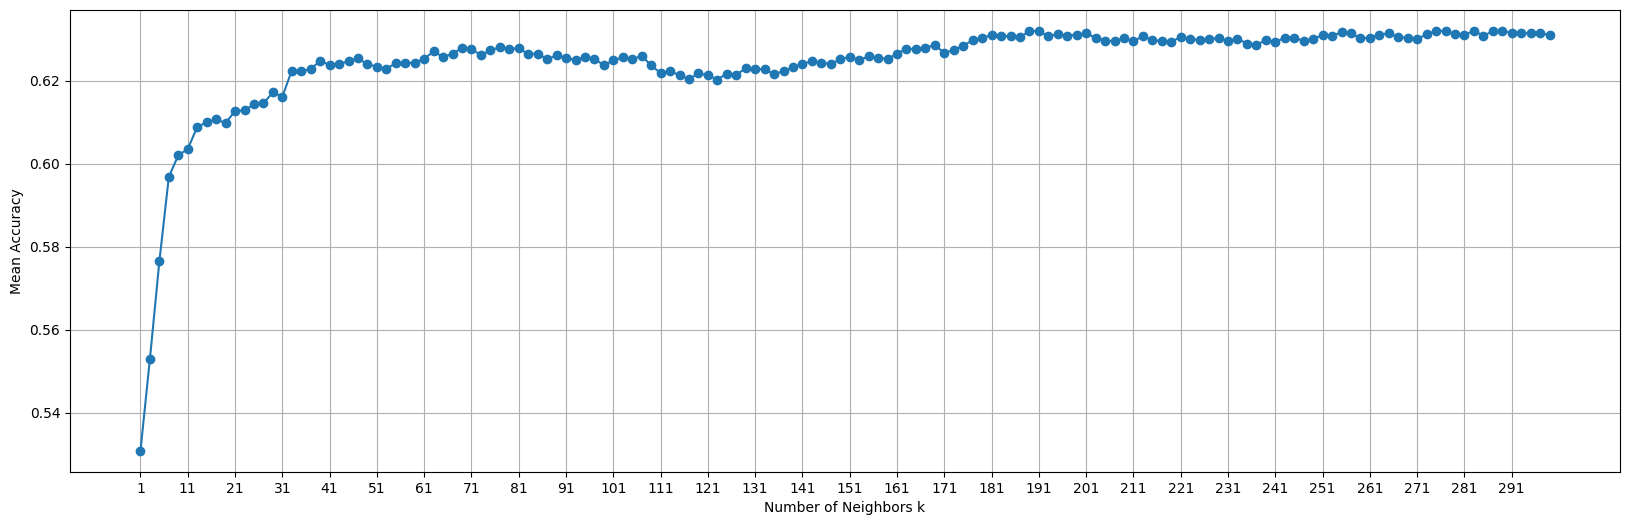

The optimal value of K is: 277


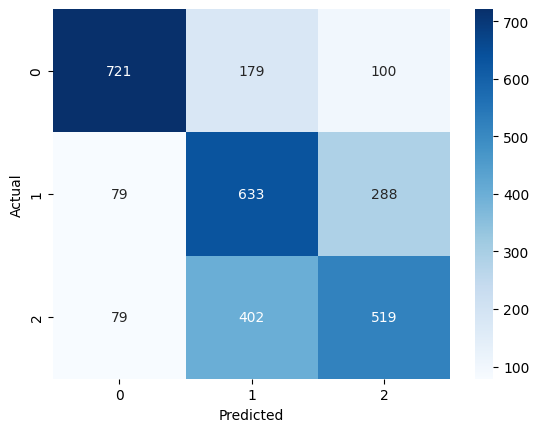

              precision    recall  f1-score   support

         1.0       0.82      0.72      0.77      1000
         2.0       0.52      0.63      0.57      1000
         3.0       0.57      0.52      0.54      1000

    accuracy                           0.62      3000
   macro avg       0.64      0.62      0.63      3000
weighted avg       0.64      0.62      0.63      3000



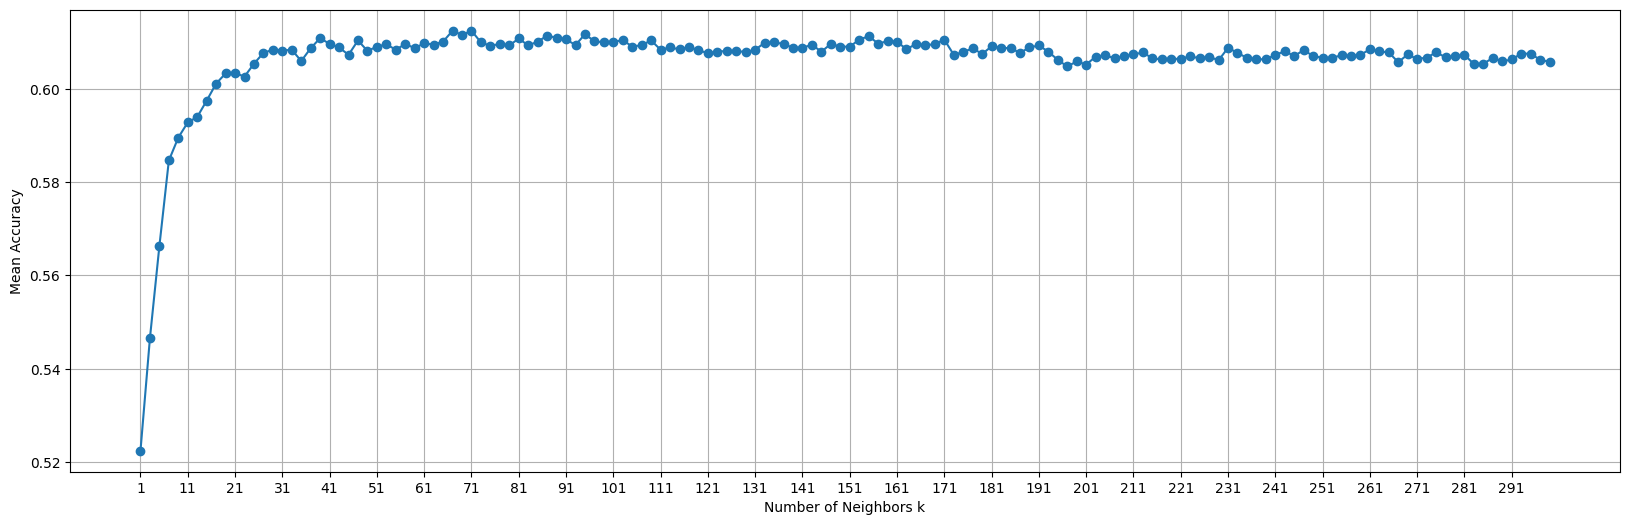

The optimal value of K is: 67


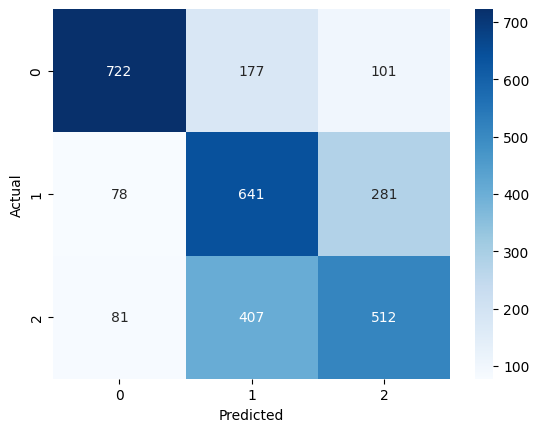

              precision    recall  f1-score   support

         1.0       0.82      0.72      0.77      1000
         2.0       0.52      0.64      0.58      1000
         3.0       0.57      0.51      0.54      1000

    accuracy                           0.62      3000
   macro avg       0.64      0.62      0.63      3000
weighted avg       0.64      0.62      0.63      3000



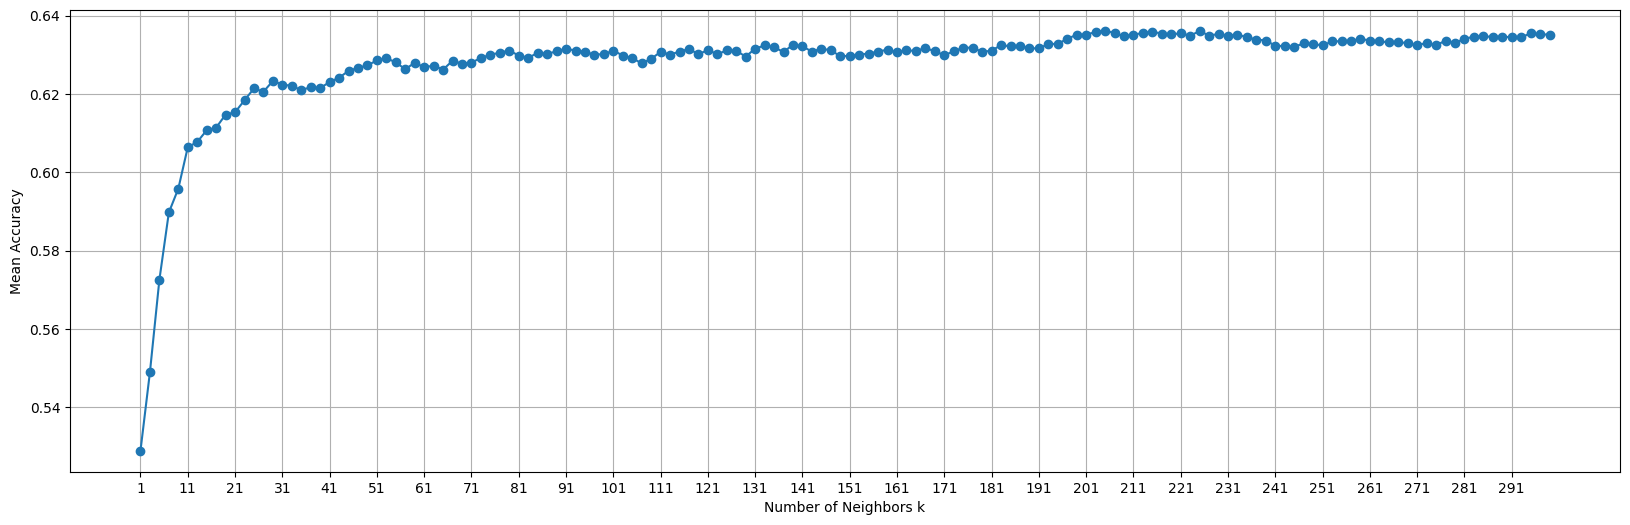

The optimal value of K is: 205


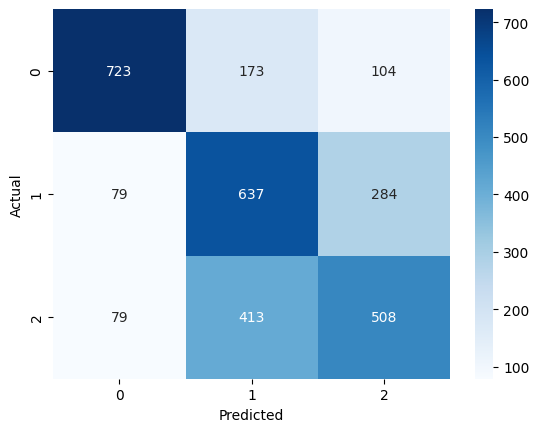

              precision    recall  f1-score   support

         1.0       0.82      0.72      0.77      1000
         2.0       0.52      0.64      0.57      1000
         3.0       0.57      0.51      0.54      1000

    accuracy                           0.62      3000
   macro avg       0.64      0.62      0.63      3000
weighted avg       0.64      0.62      0.63      3000



In [129]:
distance_metrics = ['minkowski','chebyshev','manhattan']

for distance_metric in distance_metrics:
    k_values = list(range(1,301,2))
    mean_accuracies = []


    kf = KFold(n_splits= 10, shuffle = True, random_state = Random_State)
    for k in k_values:
        knn = KNeighborsClassifier(metric=distance_metric,n_neighbors=k,n_jobs=-1)
        scores = cross_val_score(knn,X_train,y_train,cv = kf, scoring = 'accuracy')
        mean_accuracies.append(scores.mean())
    plt.figure(figsize=(20,6))
    plt.plot(k_values,mean_accuracies,marker='o')
    plt.xlabel('Number of Neighbors k')
    plt.ylabel('Mean Accuracy')
    #plt.title('KNN Classifier Accuracy vs K Value (on Training Set)')
    plt.grid(True)
    plt.xticks(range(min(k_values), max(k_values) + 1, 10))
    plt.savefig(f'images/knn-classifier-accuracy-vs-k-value-{distance_metric}.png',bbox_inches='tight')
    plt.show()

    optimal_k = k_values[np.argmax(mean_accuracies)]
    print(f'The optimal value of K is: {optimal_k}')

    optimal_knn = KNeighborsClassifier(n_neighbors=optimal_k,n_jobs=-1)
    optimal_knn.fit(X_train, y_train)

    y_pred_optimal = optimal_knn.predict(X_test)

    cm = confusion_matrix(y_test,y_pred_optimal)
    sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    # #plt.title('Confusion Matrix with Optimal K')
    plt.savefig(f'images/confusion-matrix-optimal-knn-{distance_metric}.png',bbox_inches='tight')
    plt.show()

    print(classification_report(y_test,y_pred_optimal))

In [ ]:
#277 #67 #205

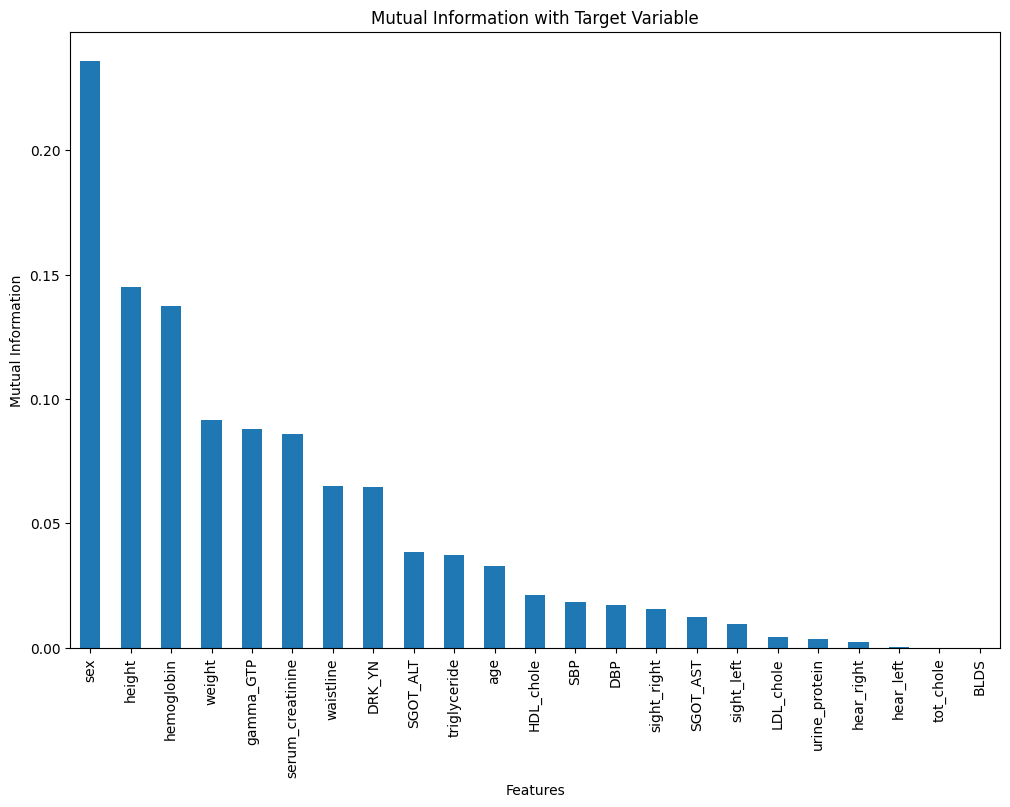

Top 4 features by mutual information: Index(['sex', 'height', 'hemoglobin', 'weight'], dtype='object')
Column indices of the top 4 features: [0, 2, 16, 3]


c:\Users\nimes\miniconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: SyntaxWarning: Parameter p is found in metric_params. The corresponding parameter from __init__ is ignored.
  return self._fit(X, y)


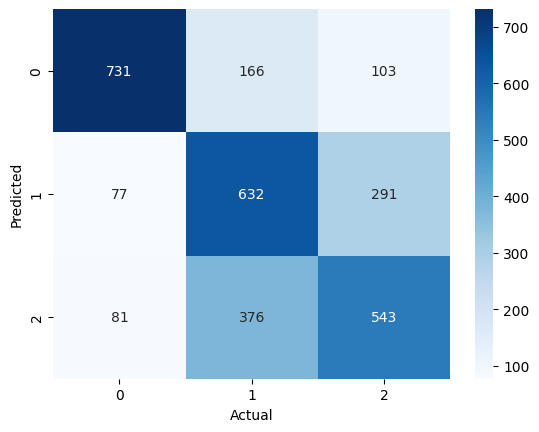

              precision    recall  f1-score   support

         1.0       0.82      0.73      0.77      1000
         2.0       0.54      0.63      0.58      1000
         3.0       0.58      0.54      0.56      1000

    accuracy                           0.64      3000
   macro avg       0.65      0.64      0.64      3000
weighted avg       0.65      0.64      0.64      3000



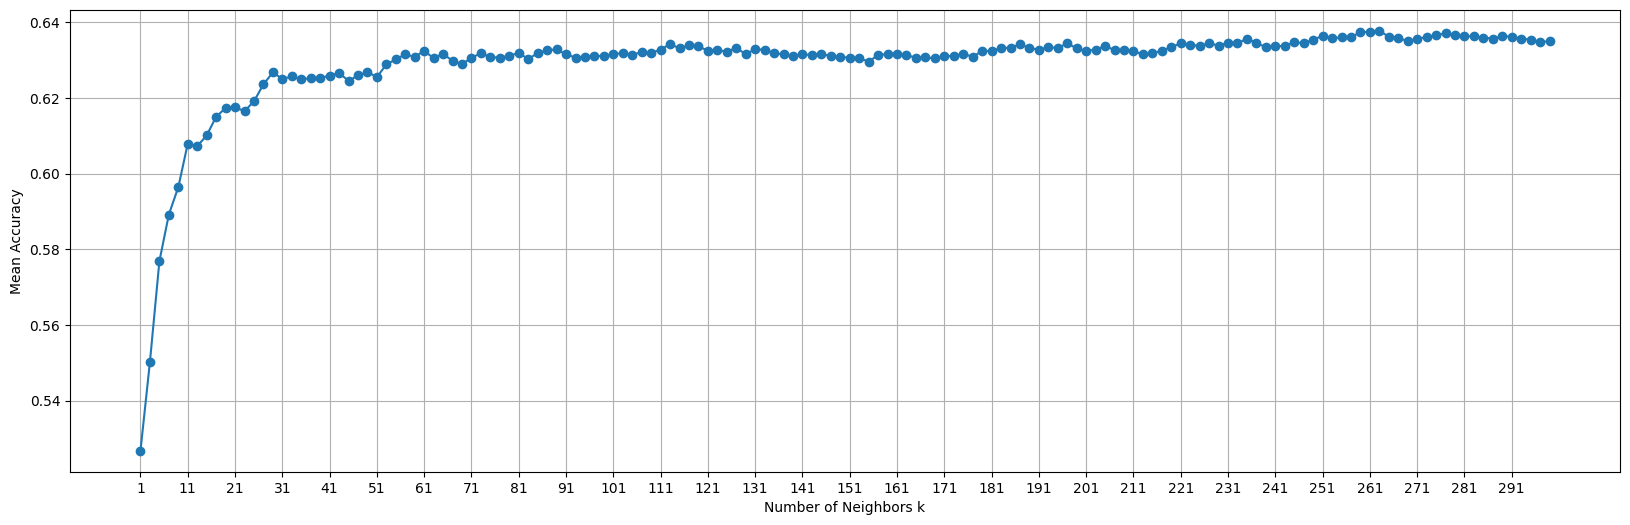

The optimal value of K is: 263


In [47]:
df_corr = pd.concat([X, y], axis=1)

# Calculate mutual information
X_features = df_corr.drop(columns=['SMK_stat_type_cd'])
y_target = df_corr['SMK_stat_type_cd']
mutual_info = mutual_info_classif(X_features, y_target)

# Create a Series for easier visualization
mutual_info_series = pd.Series(mutual_info, index=X_features.columns)

# Plot the bar plot
plt.figure(figsize=(12, 8))
mutual_info_series.sort_values(ascending=False).plot(kind='bar')
plt.title('Mutual Information with Target Variable')
plt.xlabel('Features')
plt.ylabel('Mutual Information')
plt.show()


top_4_mutual_info = mutual_info_series.sort_values(ascending=False).head(4)


top_4_features = top_4_mutual_info.index

top_4_indices = [df_corr.columns.get_loc(feature) for feature in top_4_features]

print("Top 4 features by mutual information:", top_4_features)
print("Column indices of the top 4 features:", top_4_indices)

np.random.seed(seed = 65)
weights = np.ones(23)
# weights_for_top4 = np.sort(np.random.uniform(1,4,size = 4))[::-1]
weights_for_top4 = np.random.uniform(1, 4, size=4)
weights[top_4_indices] = weights_for_top4
knn_mi = KNeighborsClassifier(metric='minkowski', metric_params={'w':weights,'p':1},n_neighbors=277)
knn_mi.fit(X_train,y_train)
y_pred_mi = knn_mi.predict(X_test)

cm = confusion_matrix(y_test,y_pred_mi)
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.savefig('confusion_matrix_mi.png',bbox_inches='tight')
plt.show()

print(classification_report(y_test,y_pred_mi))


k_values = list(range(1,301,2))
mean_accuracies = []


kf = KFold(n_splits= 10, shuffle = True, random_state = Random_State)
for k in k_values:
    knn = KNeighborsClassifier(metric='minkowski',n_neighbors=k,n_jobs=-1,metric_params={'w':weights},p=1)
    scores = cross_val_score(knn,X_train,y_train,cv = kf, scoring = 'accuracy')
    mean_accuracies.append(scores.mean())
plt.figure(figsize=(20,6))
plt.plot(k_values,mean_accuracies,marker='o')
plt.xlabel('Number of Neighbors k')
plt.ylabel('Mean Accuracy')
#plt.title('KNN Classifier Accuracy vs K Value (on Training Set)')
plt.grid(True)
plt.xticks(range(min(k_values), max(k_values) + 1, 10))
# plt.savefig(f'images/knn-classifier-accuracy-vs-k-value-{distance_metric}.png',bbox_inches='tight')
plt.show()

optimal_k = k_values[np.argmax(mean_accuracies)]
print(f'The optimal value of K is: {optimal_k}')



c:\Users\nimes\miniconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: SyntaxWarning: Parameter p is found in metric_params. The corresponding parameter from __init__ is ignored.
  return self._fit(X, y)


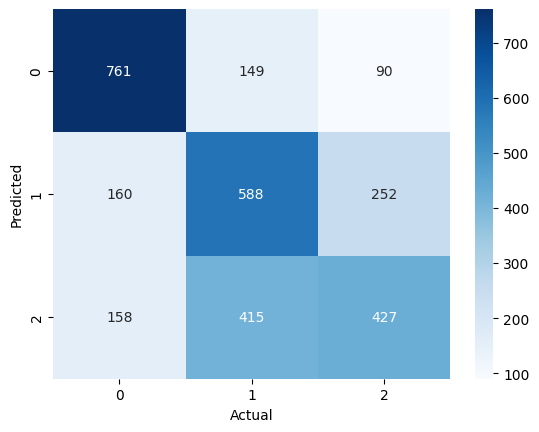

              precision    recall  f1-score   support

         1.0       0.71      0.76      0.73      1000
         2.0       0.51      0.59      0.55      1000
         3.0       0.56      0.43      0.48      1000

    accuracy                           0.59      3000
   macro avg       0.59      0.59      0.59      3000
weighted avg       0.59      0.59      0.59      3000



In [50]:
np.random.seed(seed = 65)
weights = np.ones(23)
# weights_for_top4 = np.sort(np.random.uniform(1,4,size = 4))[::-1]
weights_for_top4 = np.random.uniform(1, 4, size=4)
weights[top_4_indices] = weights_for_top4
knn_mi = KNeighborsClassifier(metric='minkowski', metric_params={'w':weights,'p':2})
knn_mi.fit(X_train,y_train)
y_pred_mi = knn_mi.predict(X_test)

cm = confusion_matrix(y_test,y_pred_mi)
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.savefig('confusion_matrix_mi.png',bbox_inches='tight')
plt.show()

print(classification_report(y_test,y_pred_mi))
